In [359]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [360]:
##################################################################################
###We will read the data from files and create dataframes in this snippet.########
##################################################################################


fileNames = glob.glob("../Data/d*")

df = pd.DataFrame([]) # defining a dataframe
for i in range(len(fileNames)):
    # Read files and save as dataframe.
    frames = pd.read_csv(fileNames[i], sep='\t', header=None, names=['Date', 'Time',  'Code','Blood_Glucose'])
    
    #Create patient id column from the name of the file. This uniquely identifies a patient.
    frames['Patient_ID']= fileNames[i][-2:]
  
    #Creating a master dataframe.
    df=df.append(frames)

#Change type of Code column to category.
df['Code'] = df['Code'].astype('category')

df['row_index'] = df.index

#Make patient id column as index.
df = df.set_index('Patient_ID')

#Convert blood glucose column to numeric. By default it's object.
df['Blood_Glucose'] = pd.to_numeric(df['Blood_Glucose'], errors='coerce')

#Drop rows that have invalid values.
df=df.dropna()

#For readability add code descriptions to the category names. These descriptions are taken from dataset description.
df.Code.cat.categories = ["UNKNOWN_0","UNKNOWN_4", "REGULAR_INSULIN_DOSE_33", "NPH_INSULIN_DOSE_34", "ULTRALENTE_INSULIN_DOSE_35", 
                          "UNKNOWN_36","UNSPECIFIED_48", "UNKNOWN_56","UNSPECIFIED_57", "PRE_BREAKFAST_58",
                          "POST_BREAKFAST_59", "PRE_LUNCH_60","POST_LUNCH_61","PRE_SUPPER_62","POST_SUPPER_63",
                          "PRE_SNACK_64", "HYPOGLYCEMIC_SYMPTOMS_65", "TYPICAL_MEAL_INJESTION_66", 
                          "MORE_MEAL_INJESTION_67", "LESS_MEAL_INJESTION_68", "TYPICAL_EXERCISE_69",
                          "MORE_EXERCISE_70","LESS_EXERCISE_71","UNSPECIFIED_72"]



In [361]:
#####################################################################################################
######Objective: Pivot the dataframe to create columns out of Code categories and perform EDA.######
####################################################################################################

#Create pivot table.
df_pivot = pd.pivot_table(df, values='Blood_Glucose', index=['Patient_ID'],
                     columns=['Code'], aggfunc='count')

#Fill invalid enteries with 0.
df_pivot = df_pivot.fillna(0)

#By default pivot creates Categorical index as Code column is of type category. This create's a problem in adding 
#new columns. The below code changes the categorical index to normal index.
df_pivot.columns = ['UNKNOWN_4', 'REGULAR_INSULIN_DOSE_33',
                  'NPH_INSULIN_DOSE_34', 'ULTRALENTE_INSULIN_DOSE_35',
                  'UNKNOWN_36', 'UNSPECIFIED_48', 'UNKNOWN_56',
                  'UNSPECIFIED_57', 'PRE_BREAKFAST_58', 'POST_BREAKFAST_59',
                  'PRE_LUNCH_60', 'POST_LUNCH_61', 'PRE_SUPPER_62',
                  'POST_SUPPER_63', 'PRE_SNACK_64', 'HYPOGLYCEMIC_SYMPTOMS_65',
                  'TYPICAL_MEAL_INJESTION_66', 'MORE_MEAL_INJESTION_67',
                  'LESS_MEAL_INJESTION_68', 'TYPICAL_EXERCISE_69',
                  'MORE_EXERCISE_70', 'LESS_EXERCISE_71', 'UNSPECIFIED_72']

#Add median column. Use only non zero values to calculate median.
df_pivot['median'] = df[df.loc[:,'Blood_Glucose']>0].groupby('Patient_ID')['Blood_Glucose'].median()

#Add std column. Use only non zero values tp calculate STD.
df_pivot['std'] = df[df.loc[:,'Blood_Glucose']>0].groupby('Patient_ID')['Blood_Glucose'].std()

#Add highs column. Get the number of times the blood glucose was above 200 for a patient. Blood glucose levels of 
#200 or higher is considered hyperglycemia.
df_pivot['highs'] = df[df.loc[:,'Blood_Glucose']>160].groupby('Patient_ID')['Blood_Glucose'].count()

df_pivot['lows'] = df[df.loc[:,'Blood_Glucose']<80].groupby('Patient_ID')['Blood_Glucose'].count()

df_pivot['Patient_ID'] = df_pivot.index;

df_pivot.index = df_pivot.index.astype(str).astype(int)



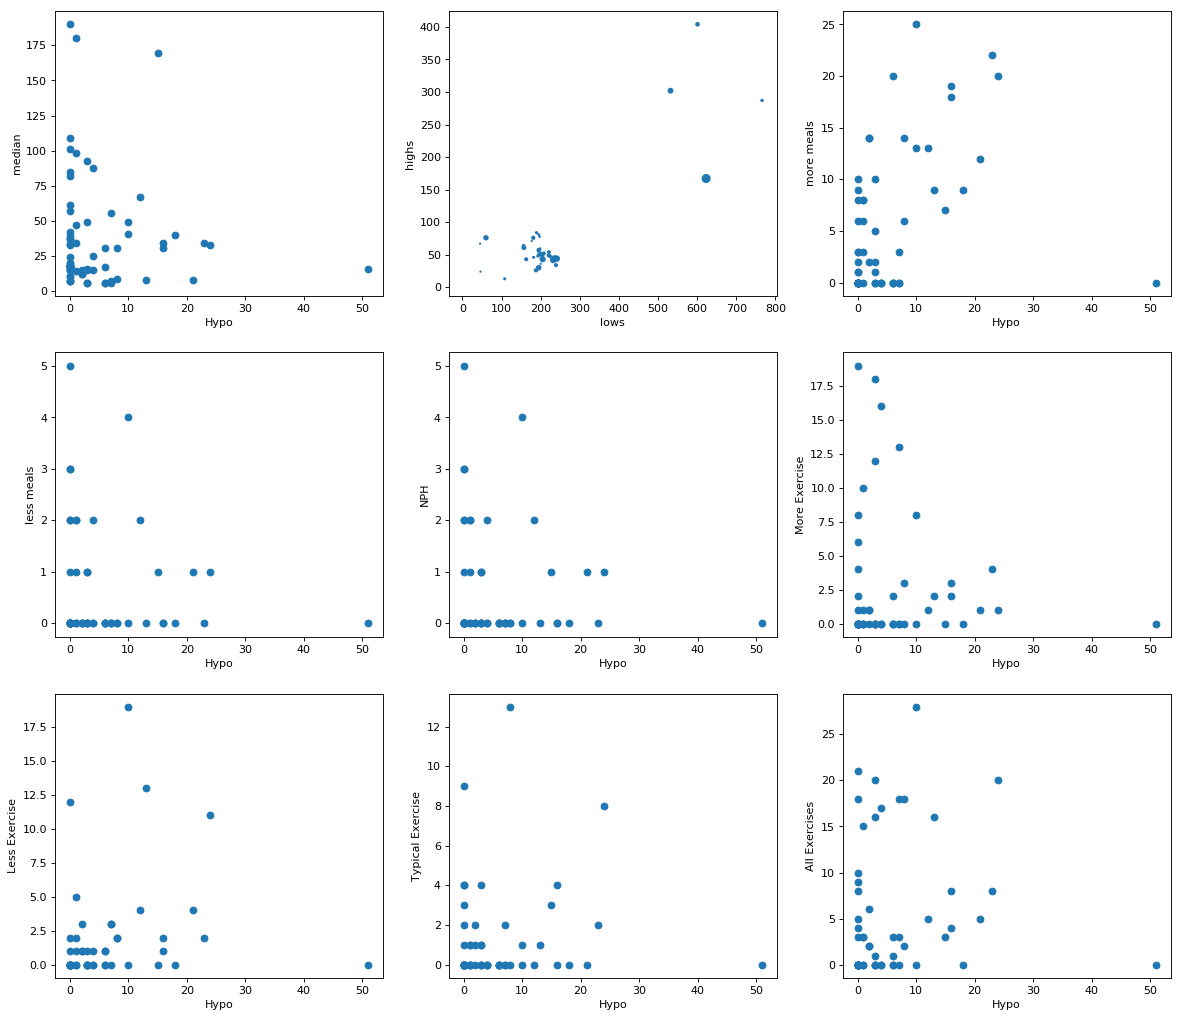

<class 'pandas.core.frame.DataFrame'>
Index: 29256 entries, 31 to 44
Data columns (total 5 columns):
Date             29256 non-null object
Time             29256 non-null object
Code             29256 non-null category
Blood_Glucose    29256 non-null float64
row_index        29256 non-null int64
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [362]:
#########################################################
#########Create various subplots to perform EDA.#########
#########Observations: None.###########################
########################################################


#Increase size of the plot area.
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3,3,1)
plt.scatter(df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'], df_pivot['median'], label='median' )
plt.xlabel('Hypo')
plt.ylabel('median')
plt.plot()

plt.subplot(3,3,2)
plt.scatter(df_pivot['lows'],df_pivot['highs'], s=df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'],label='highs' )
plt.xlabel('lows')
plt.ylabel('highs')
plt.gray()
plt.plot()

plt.subplot(3,3,3)
plt.scatter( df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'], df_pivot['MORE_MEAL_INJESTION_67'], label='more meals')
plt.xlabel('Hypo')
plt.ylabel('more meals')
plt.plot()

plt.subplot(3,3,4)
plt.scatter( df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'], df_pivot['LESS_MEAL_INJESTION_68'], label='less meals')
plt.xlabel('Hypo')
plt.ylabel('less meals')
plt.plot()

plt.subplot(3,3,5)
plt.scatter( df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'], df_pivot['LESS_MEAL_INJESTION_68'], label='NPH')
plt.xlabel('Hypo')
plt.ylabel('NPH')
plt.plot()

plt.subplot(3,3,6)
plt.scatter( df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'], df_pivot['MORE_EXERCISE_70'], label='More Exercise')
plt.xlabel('Hypo')
plt.ylabel('More Exercise')
plt.plot()

plt.subplot(3,3,7)
plt.scatter( df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'], df_pivot['LESS_EXERCISE_71'], label='Less Exercise')
plt.xlabel('Hypo')
plt.ylabel('Less Exercise')
plt.plot()


plt.subplot(3,3,8)
plt.scatter( df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'], df_pivot['TYPICAL_EXERCISE_69'], label='Typical Exercise')
plt.xlabel('Hypo')
plt.ylabel('Typical Exercise')
plt.plot()

plt.subplot(3,3,9)
plt.scatter( df_pivot['HYPOGLYCEMIC_SYMPTOMS_65'], df_pivot['TYPICAL_EXERCISE_69']+df_pivot['LESS_EXERCISE_71']+df_pivot['MORE_EXERCISE_70'], label='Typical Exercise')
plt.xlabel('Hypo')
plt.ylabel('All Exercises')
plt.plot()
plt.show()


df.info()

In [363]:
#############################################################################################
##############Merge date and time into single new column and drop the existing ones.#########
#############################################################################################

df['Date_Time'] = df['Date'].astype('str')+" "+df['Time'].astype('str')
df = df.drop(['Date', 'Time'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29256 entries, 31 to 44
Data columns (total 4 columns):
Code             29256 non-null category
Blood_Glucose    29256 non-null float64
row_index        29256 non-null int64
Date_Time        29256 non-null object
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 943.6+ KB


In [365]:
df.iloc[df.index]
df['Date_Time'] = pd.to_datetime(df['Date_Time'],format="%m-%d-%Y %H:%M", errors='coerce')
df = df.fillna(method='ffill');

#df.index
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29256 entries, 31 to 44
Data columns (total 4 columns):
Code             29256 non-null category
Blood_Glucose    29256 non-null float64
row_index        29256 non-null int64
Date_Time        29256 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 943.6+ KB


In [366]:
####Important: Execute only once - Changing index. Old Index - Patient ID; New Index - Row ID

df['Patient_ID'] = df.index.values

df.index = df['row_index']

df['Patient_ID'].unique()

array(['31', '36', '09', '07', '38', '53', '54', '62', '65', '06', '39',
       '01', '37', '08', '30', '64', '63', '55', '52', '70', '48', '41',
       '46', '12', '15', '23', '24', '47', '40', '49', '25', '22', '14',
       '13', '68', '57', '50', '59', '66', '61', '35', '32', '04', '03',
       '60', '58', '67', '51', '69', '56', '02', '05', '33', '34', '29',
       '16', '11', '18', '27', '20', '45', '42', '21', '19', '26', '10',
       '28', '17', '43', '44'], dtype=object)

In [367]:

for pid in df['Patient_ID'].unique():
    minimum = pd.to_datetime(df.loc[df['Patient_ID']==pid, 'Date_Time'].min() ,format="%m-%d-%Y %H:%M")
    df.loc[df['Patient_ID']==pid,'days'] =df.loc[df['Patient_ID']==pid, 'Date_Time'].subtract(minimum)

df.head(50)

,Code,Blood_Glucose,row_index,Date_Time,Patient_ID,days
row_index,,,,,,
0,PRE_BREAKFAST_58,101.0,0,1991-05-20 08:00:00,31,0 days 00:00:00
1,REGULAR_INSULIN_DOSE_33,5.0,1,1991-05-20 08:00:00,31,0 days 00:00:00
2,NPH_INSULIN_DOSE_34,27.0,2,1991-05-20 08:00:00,31,0 days 00:00:00
3,PRE_LUNCH_60,89.0,3,1991-05-20 12:00:00,31,0 days 04:00:00
4,REGULAR_INSULIN_DOSE_33,3.0,4,1991-05-20 12:00:00,31,0 days 04:00:00
5,PRE_SUPPER_62,94.0,5,1991-05-20 18:00:00,31,0 days 10:00:00
6,REGULAR_INSULIN_DOSE_33,6.0,6,1991-05-20 18:00:00,31,0 days 10:00:00
7,UNSPECIFIED_48,109.0,7,1991-05-20 22:00:00,31,0 days 14:00:00
8,PRE_BREAKFAST_58,174.0,8,1991-05-21 08:00:00,31,1 days 00:00:00


In [380]:
#plt.plot(df.loc[df['Patient_ID']=='01','days'], df.loc[df['Patient_ID']=='01','Blood_Glucose'])
#plt.show()
df.describe()

,Blood_Glucose,row_index,days
count,29256.000000,29256.000000,29256
mean,79.418427,317.143321,48 days 08:18:42.707136
std,93.518586,286.663338,51 days 04:29:35.138745
min,0.000000,0.000000,0 days 00:00:00
25%,6.000000,105.000000,13 days 10:00:00
50%,24.000000,220.000000,28 days 04:32:30
75%,142.000000,460.250000,69 days 08:00:00
max,501.000000,1326.000000,287 days 14:00:00
